In [158]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, "..") 
from src.data import make_dataset
import pandas as pd

pd.set_option("display.precision", 5)
pd.set_option("display.max.columns", None)
pd.options.display.float_format = '{:6.5f}'.format



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Bonds

In dit onderzoek is uitgegaan van een beperkte set bonds. Het is nog onduidelijk of de data van verlopen bonds ook zinvol is voor het onderzoek. Een bond is typisch maar kort in portefeuille waardoor we geen lange tijdreeksen hebben van een bepaalde bond. Mogelijk komt de bond wel erg over een met andere bonds die we in het verleden hebben gehad en zegt het koerstverloop van die bonds iets over het koersverloop van de huidige bonds. Mogelijk spelen benchmark bonds hier een rol bij. 

In [160]:
df_bonds = make_dataset.get_bond_data()

2021-12-28 21:14:44.020 | INFO     | src.data.make_dataset:get_bond_data:32 - Load bond data
2021-12-28 21:14:44.022 | INFO     | src.data.make_dataset:read_csv:18 - Loading data from ..\data\raw\bonds.csv


In [161]:
df_bonds.head()

,issue_dt,first_coupon_date,mature_dt,issuer_name,coupon_frq,coupon,tot_issue,issue_rating,cfi_code1,cfi_code2,cfi_code3,cfi_code4,cfi_code5,cfi_code6,bond_duration
isin,,,,,,,,,,,,,,,
EU000A1Z99M6,2020-10-26,2021-12-16,2024-12-16,EUROPEAN STABILITY MECHANISM,EUROPEAN STABILITY MECHANISM,0.00000,2000000000.00000,AAA,D,T,F,C,F,B,1096 days
FR0013415627,2019-04-24,2020-03-25,2025-03-25,REPUBLIC FRANCE,REPUBLIC FRANCE,0.00000,16394000000.00000,AA,D,B,F,T,F,N,1826 days
EU000A1G0EJ9,2020-07-15,2021-10-15,2025-10-15,EFSF,EFSF,0.00000,4000000000.00000,AA,D,T,F,T,F,B,1461 days
EU000A284451,2020-11-17,2021-11-04,2025-11-04,EUROPEAN UNION,EUROPEAN UNION,0.00000,8000000000.00000,AAA,D,N,F,C,F,B,1461 days
IT0005419848,2020-09-01,2021-02-01,2026-02-01,ITALIE,ITALIE,0.50000,18551000000.00000,BBB-,D,B,F,U,F,B,1826 days


In [162]:
df_bonds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69 entries, EU000A1Z99M6     to FR0013480613    
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   issue_dt           69 non-null     datetime64[ns] 
 1   first_coupon_date  69 non-null     datetime64[ns] 
 2   mature_dt          69 non-null     datetime64[ns] 
 3   issuer_name        69 non-null     category       
 4   coupon_frq         69 non-null     category       
 5   coupon             69 non-null     float64        
 6   tot_issue          69 non-null     float64        
 7   issue_rating       69 non-null     category       
 8   cfi_code1          69 non-null     category       
 9   cfi_code2          69 non-null     category       
 10  cfi_code3          69 non-null     category       
 11  cfi_code4          69 non-null     category       
 12  cfi_code5          69 non-null     category       
 13  cfi_code6          69 non-nu

In [164]:
df_bonds.describe()

,coupon,tot_issue,bond_duration
count,69.00000,69.00000,69
mean,0.33529,8112163014.49275,4181 days 18:46:57.391304320
std,0.50430,6607130618.86934,2489 days 11:18:33.608317600
min,0.00000,500000000.00000,1096 days 00:00:00
25%,0.00000,4195000000.00000,3287 days 00:00:00
50%,0.10000,6000000000.00000,3652 days 00:00:00
75%,0.50000,9000000000.00000,3653 days 00:00:00
max,2.50000,35119000000.00000,11688 days 00:00:00


In [123]:
df_bonds['issuer_name'].value_counts()

EUROPEAN UNION                         15
Bondsrep ber                           11
REPUBLIC FRANCE                        10
STAAT DER NEDERLANDEN                   7
SPAIN                                   6
BELGIE BRU                              5
EUROPEAN STABILITY MECHANISM            4
EFSF                                    3
REPUBLIC IRELAND                        3
ITALIE                                  2
ILE DE FRANCE MOBILITES                 1
LAND NORDRHEIN-WESTFALEN                1
LUXEMBOURG                              1
Name: issuer_name, dtype: int64

Trades

In [125]:
df_bonds['issue_rating'].value_counts()

AAA     37
AA      15
AA-      5
A-       4
A+       3
BBB+     2
BBB-     2
AA+      1
Name: issue_rating, dtype: int64

Bond prices

In [171]:
df_price = make_dataset.get_price()

2021-12-28 21:22:28.198 | INFO     | src.data.make_dataset:get_price:87 - Load bond price data
2021-12-28 21:22:28.199 | INFO     | src.data.make_dataset:read_csv:18 - Loading data from ..\data\raw\price.csv


In [172]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28892 entries, 0 to 28891
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reference_identifier  28892 non-null  string        
 1   ccy                   28892 non-null  string        
 2   rate_dt               28892 non-null  datetime64[ns]
 3   mid                   28892 non-null  float64       
dtypes: datetime64[ns](1), float64(1), string(2)
memory usage: 903.0 KB


In [186]:
import seaborn as sns
import matplotlib as plt

df = df_price.copy()
df = df.set_index('rate_dt')


<AxesSubplot:xlabel='rate_dt', ylabel='mid'>

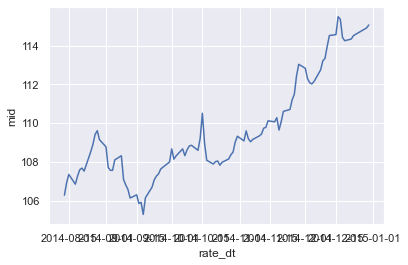

In [208]:

sns.lineplot(x="rate_dt", y="mid", 
             data=df.loc['2014'])

ValueError: cannot reindex from a duplicate axis

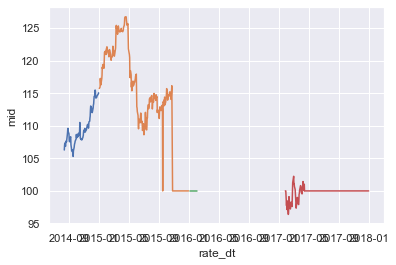

In [210]:
sns.set_theme(style="darkgrid")

sns.scatterplot(x="rate_dt", y="mid", 
             data=df.loc['2014'])

sns.scatterplot(x="rate_dt", y="mid", 
             data=df.loc['2015'])

sns.scatterplot(x="rate_dt", y="mid", 
             data=df.loc['2016'])

sns.scatterplot(x="rate_dt", y="mid", 
             data=df.loc['2017'])

sns.scatterplot(x="rate_dt", y="mid", 
             data=df.loc['2018'])

sns.scatterplot(x="rate_dt", y="mid", 
             data=df.loc['2019'])

sns.scatterplot(x="rate_dt", y="mid", 
             data=df.loc['2020'])

sns.scatterplot(x="rate_dt", y="mid", 
             data=df.loc['2021'])

In [ ]:


sns.lineplot(data = df, x = 'rate_dt', y = 'mid', hue = 'reference_identifier', legend =  None  )

Government Yield

Credit Spread

Inflation